In [1]:
import pandas as pd
from dateutil.relativedelta import relativedelta
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")
import math
import os
from datetime import date, timedelta, datetime
import time
from tqdm import tqdm
import seaborn as sns
from scipy import stats
from matplotlib.ticker import MaxNLocator
from matplotlib.backends.backend_pdf import PdfPages
start_time = time.perf_counter()

In [2]:
mapping = pd.read_excel("company_master_mapping.xlsx")
# price_data = d.fetch_price_data(no_of_years=20)
price_data = pd.read_csv('stockPriceData-3.csv')
# Convert 'Date' to datetime type
price_data['Date'] = pd.to_datetime(price_data['Date'])

# Create a dictionary mapping from SYMBOL_NSE to SYMBOL_CM
mapping = dict(zip(mapping["SYMBOL_NSE"], mapping["SYMBOL_CM"]))
price_data["Symbol"] = price_data["Symbol"].replace(mapping)

top_500 =  price_data.groupby('Date', group_keys= False).apply(lambda x: x.sort_values(by='Mcap', ascending=False).head(500))
# Filter price data for dates after '2006-01-01' and drop duplicates
price_data.drop_duplicates(['Date', 'Symbol'], inplace=True)

#company master swapping
# company_master = d.fetch_data_from_database(table_name='Companymaster')
company_master = pd.read_csv('Companymaster_3_2_2025.csv')
company_master["SYMBOL"] = company_master["SYMBOL"].replace(mapping)

yearly = pd.read_csv('Finance_pl_3_2_2025.csv')
Quaterly = pd.read_csv('Quarterly_3_2_2025.csv')
Finance_bs =  pd.read_csv('Finance_bs_3_2_2025.csv')[[ 'Year_end', 'Fincode', 'Share_Capital', 'Reserve']]

rebal_dates = pd.read_csv('GrowthDate.csv')

rebal_dates["Date"] = pd.to_datetime(rebal_dates["Date"])
rebal=rebal_dates['Date']

Rebalance_Qtr=list(rebal_dates['Quarter'])
Rebalance_Date=list(rebal_dates['Date'])
Qtr_date_dict=dict(zip(Rebalance_Date,Rebalance_Qtr))
date_Qtr_dict=dict(zip(Rebalance_Qtr,Rebalance_Date))
top_500['Quarter']=top_500['Date'].map(Qtr_date_dict)
index_constituents_data= top_500

X = Quaterly[Quaterly['Result_Type'] == 'Q']
print(X.columns)
X
# # yearly.to_csv('yearly.csv')
# # Quaterly.to_csv('Quaterly.csv')
# # Finance_bs.to_csv('Finance_bs.csv')
# # company_master.to_csv('Companymaster.csv')

Index(['Fincode', 'Result_Type', 'NoOfMonths', 'Date_End', 'NET_SALES',
       'INT_ADV', 'INC_INV', 'INT_BAL', 'INT_OTHERS', 'OTHER_INCOME',
       ...
       'exc_foreign_exch_gain', 'exc_other', 'Curr_tax', 'Def_tax',
       'Fringe_benefits', 'Prior_Period_Tax', 'Mat_Credit', 'Other_Tax',
       'flag', 'notes'],
      dtype='object', length=132)


,Fincode,Result_Type,NoOfMonths,Date_End,NET_SALES,INT_ADV,INC_INV,INT_BAL,INT_OTHERS,OTHER_INCOME,...,exc_foreign_exch_gain,exc_other,Curr_tax,Def_tax,Fringe_benefits,Prior_Period_Tax,Mat_Credit,Other_Tax,flag,notes
96,100002,Q,3.0,200003,1491.10,0.0,0.0,0.0,0.0,25.90,...,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,A,NaN
97,100002,Q,3.0,200006,1648.37,0.0,0.0,0.0,0.0,49.47,...,0.0,0.00,8.00,0.00,0.0,0.0,0.0,0.0,A,NaN
98,100002,Q,3.0,200009,1935.69,0.0,0.0,0.0,0.0,11.27,...,0.0,0.00,62.00,0.00,0.0,0.0,0.0,0.0,A,NaN
99,100002,Q,3.0,200012,2860.59,0.0,0.0,0.0,0.0,48.83,...,0.0,0.00,95.00,0.00,0.0,0.0,0.0,0.0,A,NaN
100,100002,Q,3.0,200103,2021.72,0.0,0.0,0.0,0.0,18.45,...,0.0,0.00,13.00,0.00,0.0,0.0,0.0,0.0,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925157,317142,Q,3.0,202409,510.91,0.0,0.0,0.0,0.0,2.60,...,0.0,0.00,0.00,0.15,0.0,0.0,0.0,0.0,A,NaN
925159,317635,Q,3.0,202412,13920.09,0.0,0.0,0.0,0.0,166.66,...,0.0,0.00,477.10,-32.14,0.0,0.0,0.0,0.0,A,NaN
925163,318188,Q,3.0,202409,679.80,0.0,0.0,0.0,0.0,5.84,...,0.0,-9.54,0.00,0.00,0.0,0.0,0.0,0.0,A,NaN
925164,318188,Q,3.0,202412,3367.49,0.0,0.0,0.0,0.0,50.14,...,0.0,-1005.23,0.00,0.00,0.0,0.0,0.0,0.0,A,NaN


In [3]:
# Calculating Networth 
Finance_bs['NetWorth'] = Finance_bs['Share_Capital'] + Finance_bs['Reserve']
Finance_bs2 = Finance_bs[['Year_end', 'Fincode', 'NetWorth']]
Finance_bs3 = pd.merge(Finance_bs2, company_master[['FINCODE', 'SYMBOL']], left_on='Fincode', right_on='FINCODE')
Finance_bs3 = Finance_bs3[['Year_end', 'FINCODE', 'SYMBOL', 'NetWorth']]

# Revisd PAT in units
pat_df= X[['Date_End', 'Fincode', 'PAT']]
pat_df['PAT'] = pat_df['PAT']/10


# Calculating Networth on quarterly basis
p =pd.merge(pat_df, Finance_bs3, left_on=['Date_End','Fincode'], right_on=['Year_end','FINCODE'], how='left')
p['SYMBOL'] = p.groupby('Fincode', group_keys=False)['SYMBOL'].apply(lambda x: x.fillna(method='ffill'))
p = p.drop(columns=['Year_end', 'FINCODE'])

In [4]:
# Quarterly Networth Calculation
def fill_networth(row, prev_networth):
    if pd.isna(row['NetWorth']):
        return prev_networth + row['PAT']
    else:
        return row['NetWorth']

def fill_networth_column(df):
    df = df.sort_values(by=['Fincode', 'Date_End']) 
    df['NetWorth_Filled'] = np.nan
    
    for fincode in df['Fincode'].unique():
        prev_networth = None
        for i, row in df[df['Fincode'] == fincode].iterrows():
            if prev_networth is None:
                prev_networth = row['NetWorth']
            else:
                df.at[i, 'NetWorth_Filled'] = fill_networth(row, prev_networth)
                prev_networth = df.at[i, 'NetWorth_Filled']
    
    return df

# Apply the function
p = fill_networth_column(p)

# Fill any remaining NaN in the original NetWorth column with the filled values
p['NetWorth'] = p['NetWorth'].combine_first(p['NetWorth_Filled'])
p.drop(columns=['NetWorth_Filled'], inplace=True)
p = p.dropna()

In [5]:
# Calculating ROE from scratch
p['ROE'] = p.groupby('SYMBOL', group_keys=False).apply(lambda x: x['PAT']/x['NetWorth'])
p['ROE_ttm'] = p.groupby('SYMBOL', group_keys=False)['ROE'].apply(lambda x: x.rolling(window=4).sum())
roe_ttm = p[['Fincode', 'Date_End', 'ROE_ttm']]

quality = X[['Fincode','Date_End','Debt/Equity Ratio', 'Adj_eps_abs']]
quality = pd.merge(quality, roe_ttm, on=['Fincode', 'Date_End'])
pl_quality = pd.merge(quality, company_master, how='inner', left_on='Fincode', right_on='FINCODE')

In [6]:
a = pl_quality[['Fincode', 'Date_End', 'Debt/Equity Ratio', 'ROE_ttm', 'SYMBOL', 'Adj_eps_abs']].reset_index(drop=True)

# Removing the rows with NaN Symbol Names
a = a[a.SYMBOL.notna()]

# Filtering Stocks which have been historically in top 500 universe only.
b = a[a.SYMBOL.isin(top_500.Symbol.unique())]

# Filter out stocks with fewer than 4 quarters of history
symbol_quarter_counts = b.groupby('SYMBOL').size()
valid_symbols = symbol_quarter_counts[symbol_quarter_counts >= 4].index
b = b[b['SYMBOL'].isin(valid_symbols)]

# Define a function to check for 2 consecutive quarters of negative EPS within a 1-year period
def has_2_consecutive_negative_in_last_1_year(series):
    return series.rolling(window=4, min_periods=4).apply(
        lambda x: any((x[i] < 0 and x[i + 1] < 0) for i in range(len(x) - 1)), raw=True
    )

# Apply the function to create a flag for exclusion
b['exclude_flag'] = b.groupby('SYMBOL')['Adj_eps_abs'].transform(has_2_consecutive_negative_in_last_1_year)

# Filter out rows based on the exclude flag
b_filtered = b[b['exclude_flag'] != 1].reset_index(drop=True)

# Drop the intermediate column used for filtering
b_filtered = b_filtered.drop(columns=['exclude_flag'])

# Calculate Adjusted EPS TTM
b_filtered['Adj_eps_abs_TTM'] = b_filtered.groupby('SYMBOL')['Adj_eps_abs'].transform(lambda x: x.rolling(4).sum())

In [7]:
SectorThemeGICS = pd.read_excel('SectorMapping.xlsx')
df = pd.merge(b_filtered, SectorThemeGICS[['Symbol', 'Sector']], left_on='SYMBOL', right_on='Symbol', how='left')

# Calculating ROE for TTM for the past 3 Years years
df['ROE_ttm'] = df.groupby('Symbol')['ROE_ttm'].transform(lambda x : x.rolling(12).mean())

# Create a new column for quarter information
df['Quarter'] = pd.to_datetime(df['Date_End'], format='%Y%m').dt.quarter

#  EPS Growth Calculation
def calculate_yoy_eps_growth(eps):
    """Calculates YoY EPS Growth based on the provided rules."""
    growth = []
    for i in range(len(eps)):
        if i < 4:
            growth.append(np.nan) 
        else:
            prev_eps = eps.iloc[i - 4]  
            curr_eps = eps.iloc[i]      
            if prev_eps > 0:
                growth.append((curr_eps - prev_eps) / prev_eps)
            elif prev_eps < 0:
                growth.append(-(curr_eps - prev_eps) / prev_eps)
            else:
                growth.append(np.nan)  
    return pd.Series(growth, index=eps.index)  

# Calculating YoY EPS Growth for each quarter
df['YoY_EPS_Growth'] = df.groupby('SYMBOL')['Adj_eps_abs'].transform(calculate_yoy_eps_growth)

In [8]:
# Calculate 3-year mean and std deviation for each quarter separately
def calc_quarterly_stats(group):
    group = group.sort_values('Date_End')
    group['Mean_YoY_EPS_Growth'] = group['YoY_EPS_Growth'].rolling(window=3, min_periods=1).mean()
    group['Std_YoY_EPS_Growth'] = group['YoY_EPS_Growth'].rolling(window=3, min_periods=1).std()
    return group

# Apply function to each SYMBOL and Quarter group
df = df.groupby(['SYMBOL', 'Quarter'], group_keys=False).apply(calc_quarterly_stats)

# Dropping Quarter column after calculation to keep the original dataframe structure
df.drop(columns=['Quarter'], inplace=True)

# Calculating rolling 3-year mean and std deviation for EPS growth
df['Mean_YoY_EPS_Growth'] = df.groupby('SYMBOL')['YoY_EPS_Growth'].transform(lambda x: x.rolling(window=12,min_periods=4).mean())
df['Std_YoY_EPS_Growth'] = df.groupby('SYMBOL')['YoY_EPS_Growth'].transform(lambda x: x.rolling(window=12,min_periods=4).std())

# Calulating EPS Growth Variability
df['EPS_Growth_Variability'] = df['Mean_YoY_EPS_Growth'].div(df['Std_YoY_EPS_Growth'])

In [13]:
# Split data into three sectors: Bank, Finance, and Others
bank_df = df[df['Sector'] == 'Bank']
finance_df = df[df['Sector'] == 'Finance']
non_financials_df = df[~df['Sector'].isin(['Bank', 'Finance'])]

# Calculate metrics for Bank sector
bank_df['mean_roe_bank'] = bank_df.groupby('Date_End')['ROE_ttm'].transform('mean')
bank_df['std_roe_bank'] = bank_df.groupby('Date_End')['ROE_ttm'].transform('std')
bank_df['mean_eps_growth_variability_bank'] = bank_df.groupby('Date_End')['EPS_Growth_Variability'].transform('mean')
bank_df['std_eps_growth_variability_bank'] = bank_df.groupby('Date_End')['EPS_Growth_Variability'].transform('std')

# Calculate metrics for Finance sector
finance_df['mean_roe_fin'] = finance_df.groupby('Date_End')['ROE_ttm'].transform('mean')
finance_df['std_roe_fin'] = finance_df.groupby('Date_End')['ROE_ttm'].transform('std')
finance_df['mean_eps_growth_variability_fin'] = finance_df.groupby('Date_End')['EPS_Growth_Variability'].transform('mean')
finance_df['std_eps_growth_variability_fin'] = finance_df.groupby('Date_End')['EPS_Growth_Variability'].transform('std')

# Calculate metrics for non-financials
non_financials_df['mean_roe'] = non_financials_df.groupby('Date_End')['ROE_ttm'].transform('mean')
non_financials_df['std_roe'] = non_financials_df.groupby('Date_End')['ROE_ttm'].transform('std')
non_financials_df['mean_de'] = non_financials_df.groupby('Date_End')['Debt/Equity Ratio'].transform('mean')
non_financials_df['std_de'] = non_financials_df.groupby('Date_End')['Debt/Equity Ratio'].transform('std')
non_financials_df['mean_eps_growth_variability'] = non_financials_df.groupby('Date_End')['EPS_Growth_Variability'].transform('mean')
non_financials_df['std_eps_growth_variability'] = non_financials_df.groupby('Date_End')['EPS_Growth_Variability'].transform('std')

# Z-Score calculations for Bank sector
bank_df['Z_ROE_ttm_bank'] = (bank_df['ROE_ttm'] - bank_df['mean_roe_bank']) / bank_df['std_roe_bank']
bank_df['Z_EPS_Growth_Variability_bank'] = (bank_df['EPS_Growth_Variability'] - bank_df['mean_eps_growth_variability_bank']) / bank_df['std_eps_growth_variability_bank']

# Z-Score calculations for Finance sector
finance_df['Z_ROE_ttm_fin'] = (finance_df['ROE_ttm'] - finance_df['mean_roe_fin']) / finance_df['std_roe_fin']
finance_df['Z_EPS_Growth_Variability_fin'] = (finance_df['EPS_Growth_Variability'] - finance_df['mean_eps_growth_variability_fin']) / finance_df['std_eps_growth_variability_fin']

# Z-Score calculations for non-financials
non_financials_df['Z_ROE_ttm'] = (non_financials_df['ROE_ttm'] - non_financials_df['mean_roe']) / non_financials_df['std_roe']
non_financials_df['Z_DE'] = (non_financials_df['Debt/Equity Ratio'] - non_financials_df['mean_de']) / non_financials_df['std_de']
non_financials_df['Z_EPS_Growth_Variability'] = (non_financials_df['EPS_Growth_Variability'] - non_financials_df['mean_eps_growth_variability']) / non_financials_df['std_eps_growth_variability']

# Weighted Average Z Quality Score calculation
def calculate_weighted_avg_z(row):
    if row['Sector'] == 'Bank':
        return (1/2) * row['Z_ROE_ttm_bank'] - (1/2) * abs(row['Z_EPS_Growth_Variability_bank'])
    elif row['Sector'] == 'Finance':
        return (1/2) * row['Z_ROE_ttm_fin'] - (1/2) * abs(row['Z_EPS_Growth_Variability_fin'])
    else:
        return (1/3) * row['Z_ROE_ttm'] - (1/3) * abs(row['Z_DE']) - (1/3) * abs(row['Z_EPS_Growth_Variability'])

# Combine all dataframes
df_combined = pd.concat([bank_df, finance_df, non_financials_df]).reset_index(drop=True)

# Calculate weighted average Z-score
df_combined['WeightedAvgZ'] = df_combined.apply(calculate_weighted_avg_z, axis=1)

# Calculate Normalized Quality Score
df_combined['Quality_Score'] = np.where(df_combined['WeightedAvgZ'] >= 0, 
                                      1 + df_combined['WeightedAvgZ'], 
                                      (1 - df_combined['WeightedAvgZ'])**-1)
df_combined
# Final dataframe with required columns
# df = df_combined[['Date_End', 'Symbol', 'Sector', 'Quality_Score']].dropna().reset_index(drop=True)

,Fincode,Date_End,Debt/Equity Ratio,ROE_ttm,SYMBOL,Adj_eps_abs,Adj_eps_abs_TTM,Symbol,Sector,YoY_EPS_Growth,...,std_roe,mean_de,std_de,mean_eps_growth_variability,std_eps_growth_variability,Z_ROE_ttm,Z_DE,Z_EPS_Growth_Variability,WeightedAvgZ,Quality_Score
0,132480,200303,0.0,NaN,ALBK,1.6075,NaN,ALBK,Bank,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132480,200403,0.0,NaN,ALBK,6.3785,13.3654,ALBK,Bank,2.967963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,132480,200503,0.0,NaN,ALBK,2.2878,15.6272,ALBK,Bank,-0.641326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,132480,200603,0.0,NaN,ALBK,3.3691,15.8076,ALBK,Bank,0.472637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,132480,200703,0.0,0.000030,ALBK,2.8148,16.7930,ALBK,Bank,-0.164525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.154142,0.866444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75942,131335,201612,0.0,0.002873,ZYDUSWELL,6.4346,27.2536,ZYDUSWELL,FMCG,-0.077437,...,0.082986,0.263245,4.909960,0.322826,0.254302,-0.338696,-0.053615,-0.055724,-0.149345,0.870061
75943,131335,201712,0.0,0.002508,ZYDUSWELL,9.2449,32.6619,ZYDUSWELL,FMCG,0.436748,...,0.082082,0.117498,1.460792,0.332197,0.246939,-0.351931,-0.080434,-0.097411,-0.176592,0.849912
75944,131335,201812,0.0,0.002245,ZYDUSWELL,10.1331,36.5191,ZYDUSWELL,FMCG,0.096075,...,0.079842,0.163476,1.879236,0.318570,0.252069,-0.382915,-0.086991,-0.002604,-0.157503,0.863928
75945,131335,202212,0.0,0.001614,ZYDUSWELL,2.3621,4.1844,ZYDUSWELL,FMCG,-0.766893,...,0.131359,0.055931,0.900959,0.340123,0.279160,-0.306655,-0.062079,-0.213521,-0.194085,0.837461


In [ ]:
# # Calculate cross-sectional rank (across all stocks for each date)
# df_combined['Cross_Sectional_Rank'] = df_combined.groupby('Date_End')['Quality_Score'].rank(method='min', ascending=False)

# # Calculate within-sector rank (within each sector for each date)
# df_combined['Within_Sector_Rank'] = df_combined.groupby(['Date_End', 'Sector'])['Quality_Score'].rank(method='min', ascending=False)
# a
# # Convert ranks to percentiles for better averaging
# # Cross-sectional percentile (0-100 scale)
# df_combined['Cross_Sectional_Percentile'] = df_combined.groupby('Date_End')['Quality_Score'].rank(method='min', ascending=False, pct=True) * 100

# # Within-sector percentile (0-100 scale)
# df_combined['Within_Sector_Percentile'] = df_combined.groupby(['Date_End', 'Sector'])['Quality_Score'].rank(method='min', ascending=False, pct=True) * 100

# # Calculate final combined rank as average of cross-sectional and within-sector percentiles
# df_combined['Final_Combined_Percentile'] = (df_combined['Cross_Sectional_Percentile'] + df_combined['Within_Sector_Percentile']) / 2

# # Convert final percentile back to rank (optional - if you prefer ranks over percentiles)
# df_combined['Final_Combined_Rank'] = df_combined.groupby('Date_End')['Final_Combined_Percentile'].rank(method='min', ascending=False)

# # Display the results
# print("Sample of the ranking results:")
# sample_df = df_combined[['Date_End', 'Symbol', 'Sector', 'Quality_Score', 
#                         'Cross_Sectional_Rank', 'Within_Sector_Rank', 
#                         'Cross_Sectional_Percentile', 'Within_Sector_Percentile',
#                         'Final_Combined_Percentile', 'Final_Combined_Rank']].head(10)
# print(sample_df)

# # Summary statistics by sector
# print("\nRanking summary by sector for latest date:")
# latest_date = df_combined['Date_End'].max()
# latest_data = df_combined[df_combined['Date_End'] == latest_date]

# for sector in latest_data['Sector'].unique():
#     sector_data = latest_data[latest_data['Sector'] == sector]
#     print(f"\n{sector} Sector:")
#     print(f"  Number of stocks: {len(sector_data)}")
#     print(f"  Top 3 stocks by Final Combined Rank:")
#     top_3 = sector_data.nsmallest(3, 'Final_Combined_Rank')[['Symbol', 'Quality_Score', 'Final_Combined_Rank']]
#     for idx, row in top_3.iterrows():
#         print(f"    {row['Symbol']}: Quality Score = {row['Quality_Score']:.3f}, Final Rank = {row['Final_Combined_Rank']:.0f}")

# # Final dataframe with all ranking information
# df_final = df_combined[['Date_End', 'Symbol', 'Sector', 'Quality_Score',
#                        'Cross_Sectional_Rank', 'Within_Sector_Rank',
#                        'Cross_Sectional_Percentile', 'Within_Sector_Percentile',
#                        'Final_Combined_Percentile', 'Final_Combined_Rank']].copy()

# print(f"\nFinal dataframe shape: {df_final.shape}")
# print("Columns in final dataframe:", df_final.columns.tolist())

Sample of the ranking results:
   Date_End Symbol Sector  Quality_Score  Cross_Sectional_Rank  \
0    200303   ALBK   Bank            NaN                   NaN   
1    200403   ALBK   Bank            NaN                   NaN   
2    200503   ALBK   Bank            NaN                   NaN   
3    200603   ALBK   Bank            NaN                   NaN   
4    200703   ALBK   Bank       0.866444                   7.0   
5    200803   ALBK   Bank       0.875861                   5.0   
6    200903   ALBK   Bank       0.874371                  10.0   
7    201003   ALBK   Bank       0.832041                 287.0   
8    201103   ALBK   Bank       0.813590                 171.0   
9    201203   ALBK   Bank       1.187559                  56.0   

   Within_Sector_Rank  Cross_Sectional_Percentile  Within_Sector_Percentile  \
0                 NaN                         NaN                       NaN   
1                 NaN                         NaN                       NaN   
2    

In [12]:
df_final

,Date_End,Symbol,Sector,Quality_Score,Cross_Sectional_Rank,Within_Sector_Rank,Cross_Sectional_Percentile,Within_Sector_Percentile,Final_Combined_Percentile,Final_Combined_Rank
0,200303,ALBK,Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200403,ALBK,Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200503,ALBK,Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200603,ALBK,Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200703,ALBK,Bank,0.866444,7.0,6.0,20.588235,23.076923,21.832579,28.0
...,...,...,...,...,...,...,...,...,...,...
75942,201612,ZYDUSWELL,FMCG,0.870061,186.0,12.0,23.815621,33.333333,28.574477,571.0
75943,201712,ZYDUSWELL,FMCG,0.849912,221.0,10.0,28.406170,27.027027,27.716598,572.0
75944,201812,ZYDUSWELL,FMCG,0.863928,160.0,7.0,20.253165,17.500000,18.876582,661.0
75945,202212,ZYDUSWELL,FMCG,0.837461,419.0,16.0,48.834499,39.024390,43.929445,495.0


In [14]:
# First, let's calculate within-sector quality scores
# We need to recalculate Z-scores within each sector for each date

def calculate_within_sector_quality_score(df):
    df_result = df.copy()
    
    # Calculate within-sector Z-scores for each sector
    for sector in df['Sector'].unique():
        sector_mask = df['Sector'] == sector
        sector_data = df[sector_mask].copy()
        
        if sector in ['Bank', 'Finance']:
            # For Bank and Finance sectors - calculate within-sector means and stds
            sector_data['mean_roe_sector'] = sector_data.groupby('Date_End')['ROE_ttm'].transform('mean')
            sector_data['std_roe_sector'] = sector_data.groupby('Date_End')['ROE_ttm'].transform('std')
            sector_data['mean_eps_growth_variability_sector'] = sector_data.groupby('Date_End')['EPS_Growth_Variability'].transform('mean')
            sector_data['std_eps_growth_variability_sector'] = sector_data.groupby('Date_End')['EPS_Growth_Variability'].transform('std')
            
            # Calculate within-sector Z-scores
            sector_data['Z_ROE_ttm_sector'] = (sector_data['ROE_ttm'] - sector_data['mean_roe_sector']) / sector_data['std_roe_sector']
            sector_data['Z_EPS_Growth_Variability_sector'] = (sector_data['EPS_Growth_Variability'] - sector_data['mean_eps_growth_variability_sector']) / sector_data['std_eps_growth_variability_sector']
            
            # Calculate within-sector quality score
            sector_data['Within_Sector_Quality_Score'] = (1/2) * sector_data['Z_ROE_ttm_sector'] - (1/2) * abs(sector_data['Z_EPS_Growth_Variability_sector'])
            
        else:  # Non-financial sectors
            # Calculate within-sector means and stds for non-financials
            sector_data['mean_roe_sector'] = sector_data.groupby('Date_End')['ROE_ttm'].transform('mean')
            sector_data['std_roe_sector'] = sector_data.groupby('Date_End')['ROE_ttm'].transform('std')
            sector_data['mean_de_sector'] = sector_data.groupby('Date_End')['Debt/Equity Ratio'].transform('mean')
            sector_data['std_de_sector'] = sector_data.groupby('Date_End')['Debt/Equity Ratio'].transform('std')
            sector_data['mean_eps_growth_variability_sector'] = sector_data.groupby('Date_End')['EPS_Growth_Variability'].transform('mean')
            sector_data['std_eps_growth_variability_sector'] = sector_data.groupby('Date_End')['EPS_Growth_Variability'].transform('std')
            
            # Calculate within-sector Z-scores
            sector_data['Z_ROE_ttm_sector'] = (sector_data['ROE_ttm'] - sector_data['mean_roe_sector']) / sector_data['std_roe_sector']
            sector_data['Z_DE_sector'] = (sector_data['Debt/Equity Ratio'] - sector_data['mean_de_sector']) / sector_data['std_de_sector']
            sector_data['Z_EPS_Growth_Variability_sector'] = (sector_data['EPS_Growth_Variability'] - sector_data['mean_eps_growth_variability_sector']) / sector_data['std_eps_growth_variability_sector']
            
            # Calculate within-sector quality score
            sector_data['Within_Sector_Quality_Score'] = (1/3) * sector_data['Z_ROE_ttm_sector'] - (1/3) * abs(sector_data['Z_DE_sector']) - (1/3) * abs(sector_data['Z_EPS_Growth_Variability_sector'])
        
        # Update the result dataframe
        df_result.loc[sector_mask, 'Within_Sector_Quality_Score'] = sector_data['Within_Sector_Quality_Score']
    
    return df_result

# Calculate within-sector quality scores
df_combined = calculate_within_sector_quality_score(df_combined)

# Handle any NaN or infinite values that might arise from division by zero
df_combined['Within_Sector_Quality_Score'] = df_combined['Within_Sector_Quality_Score'].replace([np.inf, -np.inf], np.nan)

# Normalize within-sector quality scores to create within-sector normalized scores
def normalize_within_sector_scores(df):
    df_result = df.copy()
    df_result['Within_Sector_Normalized_Score'] = np.where(
        df_result['Within_Sector_Quality_Score'] >= 0, 
        1 + df_result['Within_Sector_Quality_Score'], 
        (1 - df_result['Within_Sector_Quality_Score'])**-1
    )
    return df_result

df_combined = normalize_within_sector_scores(df_combined)


In [18]:
df = df_combined[['Date_End', 'Symbol', 'Sector', 'Quality_Score', 'Within_Sector_Normalized_Score']].dropna().reset_index(drop=True)
df['MeanQScore'] = ((1/2) * df['Quality_Score'] + (1/2) * (df['Within_Sector_Normalized_Score']))
df

,Date_End,Symbol,Sector,Quality_Score,Within_Sector_Normalized_Score,MeanQScore
0,200703,ALBK,Bank,0.866444,0.866444,0.866444
1,200803,ALBK,Bank,0.875861,0.875861,0.875861
2,200903,ALBK,Bank,0.874371,0.874371,0.874371
3,201003,ALBK,Bank,0.832041,0.832041,0.832041
4,201103,ALBK,Bank,0.813590,0.813590,0.813590
...,...,...,...,...,...,...
38526,201612,ZYDUSWELL,FMCG,0.870061,0.734696,0.802378
38527,201712,ZYDUSWELL,FMCG,0.849912,0.744116,0.797014
38528,201812,ZYDUSWELL,FMCG,0.863928,0.754261,0.809095
38529,202212,ZYDUSWELL,FMCG,0.837461,0.733652,0.785557


In [19]:
GrowthDate = pd.read_csv('GrowthDate.csv')[['Date', 'Qtr']]
GrowthDate['Qtr'] = GrowthDate['Qtr'].astype('int')
# GrowthDate Mapping  
final_df =  pd.merge(df, GrowthDate, left_on='Date_End', right_on='Qtr').drop(columns=['Date_End', 'Qtr'])
final_df = final_df[['Date', 'Symbol', 'Sector', 'MeanQScore']].sort_values(by='Date').reset_index(drop=True)
final_df

,Date,Symbol,Sector,MeanQScore
0,2006-05-31,IOB,Bank,0.798163
1,2006-05-31,LICHSGFIN,Finance,0.678210
2,2006-05-31,PNB,Bank,0.866487
3,2006-05-31,CORPBANK,Bank,0.752314
4,2006-05-31,ICICIBANK,Bank,0.683105
...,...,...,...,...
38241,2024-11-18,BLS,Miscellaneous,0.752085
38242,2024-11-18,DICIND,Chemicals,0.677212
38243,2024-11-18,RAMKY,Infrastructure,0.701324
38244,2024-11-18,RAMCOIND,Construction Materials,0.788068


In [21]:
# Merging Quality Ranks with price data universe
price_data['Date'] = pd.to_datetime(price_data['Date'])
final_df['Date'] = pd.to_datetime(final_df['Date'])
merged_df = pd.merge(final_df[['Date', 'Symbol', 'MeanQScore']], price_data, on=['Date', 'Symbol'], how='outer')
merged_df =  merged_df.groupby('Date', group_keys= False).apply(lambda x: x.sort_values(by='Mcap', ascending=False).head(500))
merged_df['Quality_pct_rank'] = merged_df.groupby('Date', group_keys=False)['MeanQScore'].apply(lambda x : x.rank(pct=True))

In [24]:
merged_df[['Quality_pct_rank']] = merged_df.groupby('Symbol', group_keys=False)[['Quality_pct_rank']].apply(lambda x: x.fillna(method='ffill'))
qualityfinal = merged_df[['Date','Symbol','Quality_pct_rank']]
qualityfinal

,Date,Symbol,Quality_pct_rank
7,1995-05-08,RELIANCE,NaN
9,1995-05-08,TATASTEEL,NaN
5,1995-05-08,HINDPETRO,NaN
3,1995-05-08,GRASIM,NaN
1,1995-05-08,BPCL,NaN
...,...,...,...
7491269,2025-05-06,INDIACEM,0.070681
7492095,2025-05-06,SAFARI,0.725191
7490529,2025-05-06,ARVIND,0.622754
7491384,2025-05-06,JMFINANCIL,0.727735


In [25]:
top500 = qualityfinal.filter(["Symbol", "Date","Quality_pct_rank"])

## Convert the long from Dataframe to wide form dataframe
top500 = top500.pivot_table(index='Date',columns='Symbol',values='Quality_pct_rank').reset_index()
## Shifting the Date column
top500["Date"] = top500["Date"].shift(-1)
## Fill NaN value of date with todays date.
top500.iloc[-1, top500.columns.get_loc("Date")] = pd.to_datetime(date.today())

## Re-converting the wide form dataframe to long form dataframe
top500 = top500.melt(id_vars='Date', value_name = "Quality_pct_rank")
## Drop na and reset the index
top500 = top500.dropna().reset_index(drop = True)
top500 = top500[top500["Date"] >= "2006-01-01"].reset_index(drop = True).copy()
top500

,Date,Symbol,Quality_pct_rank
0,2023-12-18,360ONE,0.937173
1,2023-12-19,360ONE,0.937173
2,2023-12-20,360ONE,0.937173
3,2023-12-21,360ONE,0.937173
4,2023-12-22,360ONE,0.937173
...,...,...,...
1575464,2025-04-30,ZYDUSWELL,0.229008
1575465,2025-05-02,ZYDUSWELL,0.229008
1575466,2025-05-05,ZYDUSWELL,0.229008
1575467,2025-05-06,ZYDUSWELL,0.229008


In [26]:
top500.to_csv('NewQuality.csv')

In [66]:
price_data = pd.read_csv('stockPriceData-3.csv')
# etf_indices = pd.read_csv('.csv')
# price_data = price_data[~(price_data['Symbol'].isin(etf_indices['Symbol']))]
price_data_500 = price_data.groupby('Date', group_keys=False).apply(lambda x: x.sort_values(by='Mcap', ascending=False).head(500))
df = price_data[price_data['Symbol'].isin(price_data_500['Symbol'])]
df['Date'] = pd.to_datetime(df['Date'])
master_date = df.drop_duplicates(subset='Date')[['Date']].reset_index(drop=True)
df.set_index('Date', inplace=True)

df = df.sort_values(by=['Date','Mcap'], ascending=[True,False])
df = df.sort_values(['Symbol', 'Date'])
df['PrevClose'] = df.groupby('Symbol')['Close'].shift(1)
df['returns'] = (df['Close'] - df['PrevClose']) / df['PrevClose']

In [ ]:
top_25 = (
    top500[['Date', 'Symbol', 'Quality_pct_rank']]
      .sort_values(['Date', 'Quality_pct_rank'], ascending=[True, False])
      .groupby('Date')
      .head(25)
      .reset_index(drop=True)
)

top_25

,Date,Symbol,Quality_pct_rank
0,2006-06-01,AXISBANK,1.000000
1,2006-06-01,RELCAPITAL,0.961538
2,2006-06-01,SOUTHBANK,0.923077
3,2006-06-01,PNB,0.884615
4,2006-06-01,ORIENTBANK,0.846154
...,...,...,...
116770,2025-05-30,SUNDARMFIN,0.951654
116771,2025-05-30,ASIANPAINT,0.949109
116772,2025-05-30,APARINDS,0.946565
116773,2025-05-30,HINDZINC,0.944020


In [68]:
# Define the start date (it should start from 2006-06-19)
start_date = pd.to_datetime('2006-06-19')

# Filter the dates starting from 2006-06-19 (this ensures the start date is included)
filtered_dates = master_date[master_date['Date'] >= start_date]

# Ensure the start date is included
start_date_row = filtered_dates[filtered_dates['Date'] == start_date]

# Select every 50th date from the filtered dates (starting from the filtered list after the start date)
selected_dates = filtered_dates.iloc[::65]

# Combine the start date with the selected dates
selected_dates = pd.concat([start_date_row, selected_dates])

# Drop any NaN values and sort by date to ensure it's in the correct order
selected_dates = selected_dates.dropna().sort_values(by='Date')

combined_dates_portfolio = top_25[top_25['Date'].isin(selected_dates['Date'])]
combined_dates_portfolio

,Date,Symbol,Quality_pct_rank
300,2006-06-19,AXISBANK,1.000000
301,2006-06-19,RELCAPITAL,0.961538
302,2006-06-19,SOUTHBANK,0.923077
303,2006-06-19,PNB,0.884615
304,2006-06-19,ORIENTBANK,0.846154
...,...,...,...
116220,2025-04-01,SUNDARMFIN,0.951654
116221,2025-04-01,ASIANPAINT,0.949109
116222,2025-04-01,APARINDS,0.946565
116223,2025-04-01,HINDZINC,0.944020


In [69]:
master_date = master_date.sort_values(by='Date')
portfolio = combined_dates_portfolio.groupby("Date")["Symbol"].apply(list).reset_index()

# Expand portfolio by date
merged = pd.merge_asof(master_date, portfolio, on="Date")

merged = merged.explode("Symbol").dropna(subset=["Symbol"])
merged = merged[merged["Date"]>= '2006-06-19'].reset_index(drop=True)
merged

,Date,Symbol
0,2006-06-19,AXISBANK
1,2006-06-19,RELCAPITAL
2,2006-06-19,SOUTHBANK
3,2006-06-19,PNB
4,2006-06-19,ORIENTBANK
...,...,...
116445,2025-05-06,SUNDARMFIN
116446,2025-05-06,ASIANPAINT
116447,2025-05-06,APARINDS
116448,2025-05-06,HINDZINC


In [70]:
# Make sure 'Date' is a column, not index
df_reset = df.reset_index()

# Merge with returns
merged = pd.merge(merged, df_reset[["Date", "Symbol", "returns"]], on=["Date", "Symbol"], how="left")

# Compute NAV (average return across stocks each date)
nav = merged.groupby("Date")["returns"].mean()

# Apply rebalance cost on rebalance dates
rebalance_dates = pd.to_datetime(selected_dates['Date']).tolist()
nav.loc[nav.index.isin(rebalance_dates)] -= 0.01


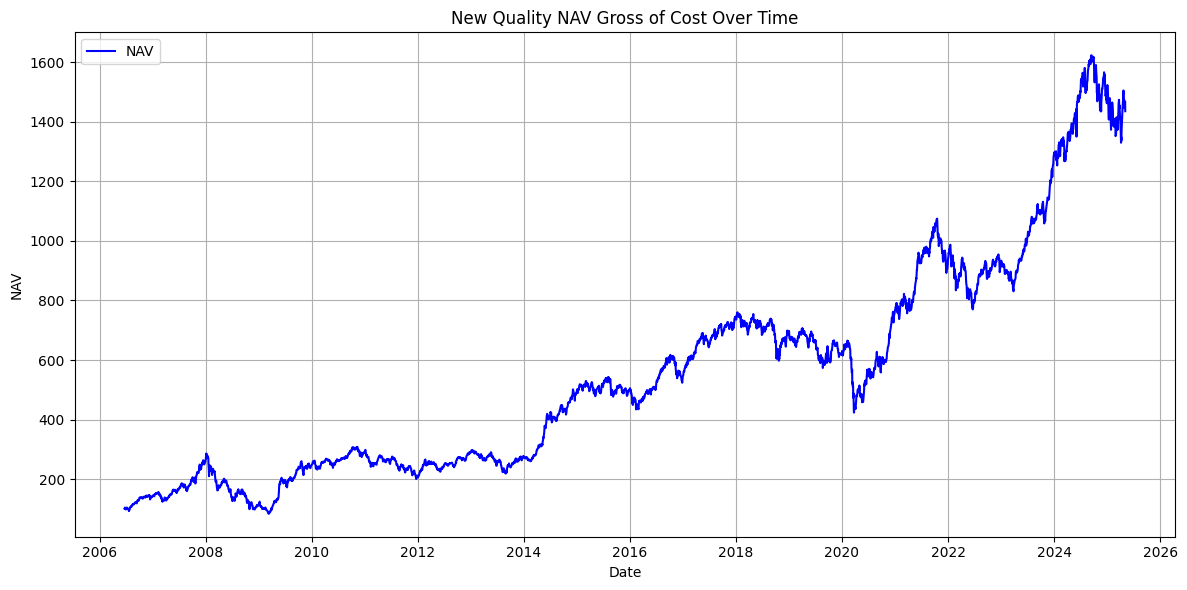

In [71]:
# Step 1: Compute NAV
nav = (1 + nav).cumprod() * 100

# Step 2: Plot NAV
plt.figure(figsize=(12, 6))
plt.plot(nav.index, nav.values, label='NAV', color='blue')
plt.title('New Quality NAV Gross of Cost Over Time')
plt.xlabel('Date')
plt.ylabel('NAV')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
# Ensure NAV is sorted
nav = nav.sort_index()
daily_returns = nav.pct_change().dropna()

# Compute overall metrics
start_date = nav.index[0]
end_date = nav.index[-1]
days = (end_date - start_date).days
years = days / 365.25

cagr = (nav.iloc[-1] / nav.iloc[0])**(1 / years) - 1
rolling_max = nav.cummax()
drawdown = nav / rolling_max - 1
mdd = drawdown.min()
volatility = daily_returns.std() * np.sqrt(252)
# Calendar Year Returns
cy_returns = nav.resample('Y').last().pct_change().dropna()
cy_returns.index = cy_returns.index.year
cy_df = pd.DataFrame({'CY Return': cy_returns})

# Financial Year Returns (Apr–Mar)
fy_nav = nav.copy()
fy_nav.index = fy_nav.index.to_period('M')
fy_ends = fy_nav.groupby(fy_nav.index.to_timestamp().to_period("A-MAR")).last()
fy_returns = fy_ends.pct_change().dropna()
fy_returns.index = fy_returns.index.year + 1
fy_df = pd.DataFrame({'FY Return': fy_returns})

# Monthly returns
monthly_periods = {
    '1M Return': 21,
    '2M Return': 42,
    '3M Return': 63,
    '6M Return': 126,
    '12M Return': 252,
    '24M Return': 504
}

monthly_data = []
for label, days_back in monthly_periods.items():
    if len(nav) > days_back:
        ret = nav.iloc[-1] / nav.iloc[-days_back] - 1
        monthly_data.append({'Metric': label, 'Value': ret, 'Period': 'Latest'})

# Summary Metrics
summary_df = pd.DataFrame({
    'Metric': ['CAGR', 'Max Drawdown', 'Annualized Volatility'],
    'Value': [cagr, mdd, volatility],
    'Period': 'Overall'
})

# Calendar Year
cy_df_formatted = cy_df.rename_axis('Year').reset_index()
cy_df_formatted['Metric'] = 'CY Return'
cy_df_formatted = cy_df_formatted.rename(columns={'Year': 'Period', 'CY Return': 'Value'})

# Financial Year
fy_df_formatted = fy_df.rename_axis('Year').reset_index()
fy_df_formatted['Metric'] = 'FY Return'
fy_df_formatted = fy_df_formatted.rename(columns={'Year': 'Period', 'FY Return': 'Value'})

# Combine all
final_df = pd.concat([
    summary_df,
    pd.DataFrame(monthly_data),
    cy_df_formatted[['Metric', 'Period', 'Value']],
    fy_df_formatted[['Metric', 'Period', 'Value']]
], ignore_index=True)

# Optional: format as percentage
final_df['Value'] = final_df['Value'].apply(lambda x: f"{x:.2%}")

# Display
print(final_df)

                   Metric    Value   Period
0                    CAGR   15.10%  Overall
1            Max Drawdown  -70.72%  Overall
2   Annualized Volatility   22.44%  Overall
3               1M Return    1.38%   Latest
4               2M Return    6.18%   Latest
5               3M Return    1.85%   Latest
6               6M Return   -3.41%   Latest
7              12M Return    4.58%   Latest
8              24M Return   59.36%   Latest
9               CY Return   86.96%     2007
10              CY Return  -57.35%     2008
11              CY Return  118.59%     2009
12              CY Return   18.41%     2010
13              CY Return  -29.65%     2011
14              CY Return   40.21%     2012
15              CY Return   -4.96%     2013
16              CY Return   80.11%     2014
17              CY Return    1.17%     2015
18              CY Return    8.52%     2016
19              CY Return   36.68%     2017
20              CY Return   -6.60%     2018
21              CY Return  -11.0

In [73]:
final_df

,Metric,Value,Period
0,CAGR,15.10%,Overall
1,Max Drawdown,-70.72%,Overall
2,Annualized Volatility,22.44%,Overall
3,1M Return,1.38%,Latest
4,2M Return,6.18%,Latest
5,3M Return,1.85%,Latest
6,6M Return,-3.41%,Latest
7,12M Return,4.58%,Latest
8,24M Return,59.36%,Latest
9,CY Return,86.96%,2007


In [75]:
combined_dates_portfolio.drop(columns=['Quality_pct_rank']).tail(25)

,Date,Symbol
116200,2025-04-01,HDFCAMC
116201,2025-04-01,NAM-INDIA
116202,2025-04-01,SBICARD
116203,2025-04-01,TCS
116204,2025-04-01,CGPOWER
116205,2025-04-01,COALINDIA
116206,2025-04-01,TVSHLTD
116207,2025-04-01,PFC
116208,2025-04-01,BAJFINANCE
116209,2025-04-01,360ONE


In [77]:
# Assuming nav is a pandas Series with Date as index
nav_df = nav.to_frame(name='NAV')

# # Reset index if you want 'Date' as a column
# nav_df = nav_df.reset_index()
# nav_df.rename(columns={'index': 'Date'}, inplace=True)
nav_df


,NAV
Date,
2006-06-19,100.845376
2006-06-20,99.629792
2006-06-21,100.730315
2006-06-22,104.534949
2006-06-23,103.453741
...,...
2025-04-29,1471.441554
2025-04-30,1446.157299
2025-05-02,1447.956930


In [78]:
# === DRAWNDOWN UTILITIES ===

def to_drawdown_series(nav_series):
    cum_max = nav_series.cummax()
    drawdown = (nav_series / cum_max) - 1
    return drawdown

def drawdown_details(drawdown_series):
    drawdowns = []
    peak, trough, recovery = None, None, None
    
    for i in range(1, len(drawdown_series)):
        if drawdown_series.iloc[i] == 0 and drawdown_series.iloc[i - 1] < 0:
            recovery = i
            if peak is not None and trough is not None:
                dd = {
                    'Peak': drawdown_series.index[peak],
                    'Trough': drawdown_series.index[trough],
                    'Recovery Date': drawdown_series.index[recovery],
                    'Max Drawdown': drawdown_series.iloc[trough],
                    'Peak To Trough Days': trough - peak,
                    'Recovery Days': recovery - trough
                }
                drawdowns.append(dd)
            peak, trough = None, None
        else:
            if peak is None or drawdown_series.iloc[i] == 0:
                peak = i
            if trough is None or drawdown_series.iloc[i] < drawdown_series.iloc[trough]:
                trough = i
    
    return pd.DataFrame(drawdowns)

def format_drawdown_dataframe(dd_df):
    if not dd_df.empty:
        dd_df['Max Drawdown'] = dd_df['Max Drawdown'] * 100  # convert to %
    return dd_df

def calculate_all_drawdowns(df):
    results = {}
    summary_stats = {}
    
    for column in df.columns:
        print(f"Calculating drawdowns for {column}...")
        price_series = df[column]
        dd_series = to_drawdown_series(price_series)
        dd_info = drawdown_details(dd_series)
        
        if dd_info.empty:
            summary_stats[column] = {
                'Total Drawdowns': 0,
                'Mean of Worst 5 Drawdowns': 0,
                'Mean of Worst 10 Drawdowns': 0,
                'Worst Drawdown': 0,
                'Average Recovery Days': 0,
                'Maximum Recovery Days': 0
            }
            continue
        
        dd_info = format_drawdown_dataframe(dd_info)
        dd_info['Index'] = column
        results[column] = dd_info
        
        worst_5 = dd_info.nsmallest(5, 'Max Drawdown')
        worst_10 = dd_info.nsmallest(10, 'Max Drawdown')
        
        summary_stats[column] = {
            'Total Drawdowns': len(dd_info),
            'Mean of Worst 5 Drawdowns': round(worst_5['Max Drawdown'].mean(), 4),
            'Mean of Worst 10 Drawdowns': round(worst_10['Max Drawdown'].mean(), 4),
            'Worst Drawdown': dd_info['Max Drawdown'].min(),
            'Average Recovery Days': dd_info['Recovery Days'].mean(),
            'Maximum Recovery Days': dd_info['Recovery Days'].max()
        }
    
    combined_df = pd.concat(results.values(), ignore_index=True) if results else pd.DataFrame()
    summary_df = pd.DataFrame(summary_stats).T
    summary_df.index.name = 'Index'
    summary_df.reset_index(inplace=True)
    
    return combined_df, summary_df, results

# === METRIC CALCULATION ===

def calculate_metrics(nav_series):
    nav_series = nav_series.dropna()
    daily_returns = nav_series.pct_change().dropna()
    
    start_date, end_date = nav_series.index[0], nav_series.index[-1]
    days = (end_date - start_date).days
    years = days / 365.25
    
    cagr = (nav_series.iloc[-1] / nav_series.iloc[0]) ** (1 / years) - 1
    rolling_max = nav_series.cummax()
    drawdown = nav_series / rolling_max - 1
    mdd = drawdown.min()
    volatility = daily_returns.std() * np.sqrt(252)
    
    # Calendar Year Returns
    cy_returns = nav_series.resample('Y').last().pct_change().dropna()
    cy_returns.index = cy_returns.index.year
    cy_df = pd.DataFrame({'CY Return': cy_returns})
    
    # Financial Year Returns (Apr–Mar)
    fy_nav = nav_series.copy()
    fy_nav.index = fy_nav.index.to_period('M')
    fy_ends = fy_nav.groupby(fy_nav.index.to_timestamp().to_period("A-MAR")).last()
    fy_returns = fy_ends.pct_change().dropna()
    fy_returns.index = fy_returns.index.year + 1
    fy_df = pd.DataFrame({'FY Return': fy_returns})
    
    # Rolling Period Returns
    monthly_periods = {
        '1M Return': 21,
        '2M Return': 42,
        '3M Return': 63,
        '6M Return': 126,
        '12M Return': 252,
        '24M Return': 504
    }
    monthly_data = []
    for label, days_back in monthly_periods.items():
        if len(nav_series) > days_back:
            ret = nav_series.iloc[-1] / nav_series.iloc[-days_back] - 1
            monthly_data.append({'Metric': label, 'Value': ret, 'Period': 'Latest'})
    
    # Summary Metrics
    summary_df = pd.DataFrame({
        'Metric': ['CAGR', 'Max Drawdown', 'Annualized Volatility'],
        'Value': [cagr, mdd, volatility],
        'Period': 'Overall'
    })
    
    # Calendar Year Formatting
    cy_df_formatted = cy_df.rename_axis('Year').reset_index()
    cy_df_formatted['Metric'] = 'CY Return'
    cy_df_formatted = cy_df_formatted.rename(columns={'Year': 'Period', 'CY Return': 'Value'})
    
    # Financial Year Formatting
    fy_df_formatted = fy_df.rename_axis('Year').reset_index()
    fy_df_formatted['Metric'] = 'FY Return'
    fy_df_formatted = fy_df_formatted.rename(columns={'Year': 'Period', 'FY Return': 'Value'})
    
    # Combine all
    final_df = pd.concat([
        summary_df,
        pd.DataFrame(monthly_data),
        cy_df_formatted[['Metric', 'Period', 'Value']],
        fy_df_formatted[['Metric', 'Period', 'Value']]
    ], ignore_index=True)
    
    return final_df

# === MAIN WORKFLOW ===

def full_analysis(nav_df):
    # Ensure datetime index
    if not pd.api.types.is_datetime64_any_dtype(nav_df.index):
        nav_df.index = pd.to_datetime(nav_df.index)
    
    nav_df = nav_df.sort_index()
    
    all_summaries = []
    all_drawdown_summaries = []
    
    for col in nav_df.columns:
        print(f"\n=== Processing {col} ===")
        metrics_df = calculate_metrics(nav_df[col])
        metrics_df['Index'] = col
        all_summaries.append(metrics_df)
    
    combined_metrics = pd.concat(all_summaries, ignore_index=True)
    
    # Calculate detailed drawdowns
    combined_dd, dd_summary_df, dd_results = calculate_all_drawdowns(nav_df)
    
    return combined_metrics, dd_summary_df, combined_dd

# === EXAMPLE USAGE ===

# Assuming you already have nav_df ready:
# nav_df = pd.read_csv('your_file.csv', index_col='Date', parse_dates=True)

combined_metrics, dd_summary_df, combined_dd = full_analysis(nav_df)

print("\n=== Combined Metrics ===")
print(combined_metrics)

print("\n=== Drawdown Summary ===")
print(dd_summary_df)


=== Processing NAV ===
Calculating drawdowns for NAV...

=== Combined Metrics ===
                   Metric     Value   Period Index
0                    CAGR  0.151025  Overall   NAV
1            Max Drawdown -0.707160  Overall   NAV
2   Annualized Volatility  0.224359  Overall   NAV
3               1M Return  0.013849   Latest   NAV
4               2M Return  0.061842   Latest   NAV
5               3M Return  0.018453   Latest   NAV
6               6M Return -0.034132   Latest   NAV
7              12M Return  0.045810   Latest   NAV
8              24M Return  0.593565   Latest   NAV
9               CY Return  0.869631     2007   NAV
10              CY Return -0.573469     2008   NAV
11              CY Return  1.185883     2009   NAV
12              CY Return  0.184066     2010   NAV
13              CY Return -0.296480     2011   NAV
14              CY Return  0.402079     2012   NAV
15              CY Return -0.049589     2013   NAV
16              CY Return  0.801072     2014   NAV

In [79]:
dd_summary_df

,Index,Total Drawdowns,Mean of Worst 5 Drawdowns,Mean of Worst 10 Drawdowns,Worst Drawdown,Average Recovery Days,Maximum Recovery Days
0,NAV,147.0,-39.8134,-26.949,-70.716007,15.326531,571.0
